In [65]:

import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
gender_data = pd.read_csv("./gender_submission.csv")
test_data = pd.read_csv("./test.csv")
train_data = pd.read_csv("./train.csv")
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

       PassengerId Survived Pclass   Name    Sex    Age  SibSp  Parch Ticket  \
count          891      891    891    891    891    891    891    891    891   
unique           1        1      1      1      1      1      1      1      1   
top          False    False  False  False  False  False  False  False  False   
freq           891      891    891    891    891    891    891    891    891   

         Fare Cabin Embarked FamilySize isAlone CategoricalFare AgeGroups  
count     891   891      891        891     891             891       891  
unique      1     2        1          1       1               1         1  
top     False  True    False      False   False           False     False  
freq      891   687      891        891     891             891       891  
                  Survived
AgeGroups                 
(0.34, 16.336]          55
(16.336, 32.252]       180
(32.252, 48.168]        76
(48.168, 64.084]        30
(64.084, 80.0]           1
                  Survived
Age

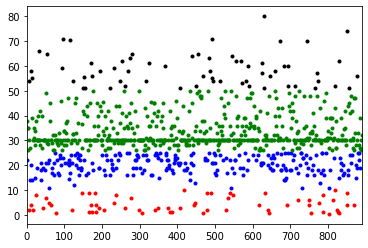

In [198]:
print(train_data.isnull().describe())
# Embarked, Age and Cabin dose the columns with null values
# Embarked
train_data['Embarked'] = train_data['Embarked'].fillna("S")
train_data['Embarked'].value_counts()

# Age
a = train_data['Age']
an = train_data[a.isnull()]
at = train_data[a.notnull()]
a0_10 = a[(0 <= a) & (a <= 10)]
a11_25= a[(11 <= a) & (a <= 25)]
a26_50 = a[(26 <= a) & (a <= 50)]
a51_100 = a[(51 <= a) & (a <= 100)]
a0_10.plot(style='.',color='red')
a11_25.plot(style='.',color='blue')
a26_50.plot(style='.',color='green')
a51_100.plot(style='.',color='black')

train_data['Age'] = a.fillna(30)
train_data['AgeGroups'] = pd.cut(train_data['Age'], 5)
print(train_data[['AgeGroups','Survived']].groupby('AgeGroups').sum())
print(train_data[['AgeGroups','Survived']].groupby('AgeGroups').mean())

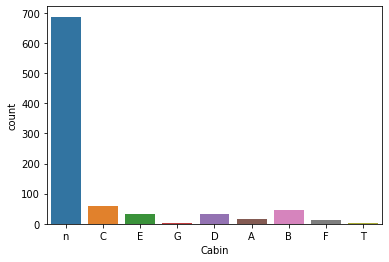

In [146]:
sns.countplot(train_data['Cabin'])
opt = train_data['Cabin'].map(lambda x: str(x)[0])
# train_data['Cabin'].unique()
sns.countplot(opt)

In [147]:
gender_data

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [156]:
# Ranking=10916 Score=0.49760
def random_predictor(data: pd.DataFrame):
    p = np.random.randint(0,2,len(data))
    prediction = pd.DataFrame(data={'PassengerId':data['PassengerId'],'Survived':p})
    prediction.to_csv('./random_submission.csv',index=False)
    return prediction
random_predictor(test_data)

PassengerId  Survived
0            892         1
1            893         0
2            894         1
3            895         1
4            896         0
5            897         0
6            898         0
7            899         1
8            900         1
9            901         0
10           902         0
11           903         1
12           904         0
13           905         0
14           906         0
15           907         0
16           908         0
17           909         1
18           910         1
19           911         1
20           912         0
21           913         1
22           914         0
23           915         1
24           916         1
25           917         1
26           918         0
27           919         1
28           920         1
29           921         0
..           ...       ...
388         1280         1
389         1281         0
390         1282         0
391         1283         0
392         1284         1
393         1285         0
394         1286         1
395         1287         0
396         1288         1
397         1289         0
398         1290         1
399         1291         1
400         1292         0
401         1293         1
402         1294         0
403         1295         1
404         1296         1
405         1297         1
406         1298         1
407         1299         0
408         1300         1
409         1301         1
410         1302         0
411         1303         0
412         1304         1
413         1305         1
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [195]:
#Pclass
train_data[['Pclass','Survived']].groupby('Pclass').mean()

#FamilySize
i=train_data['SibSp'] + train_data['Parch'] + 1
train_data['FamilySize'] = i
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

#isAllone
train_data['isAlone'] = 0
train_data.loc[train_data['FamilySize'] <= 1, 'isAlone'] = 1
print(train_data[['isAlone','Survived']].groupby(['isAlone']).mean())

#Fare
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
train_data['CategoricalFare'] = pd.qcut(train_data['Fare'],2)

print(train_data['CategoricalFare'].value_counts())
# print(train_data['CategoricalFare'].head())
# print(train_data[['CategoricalFare','Survived']].groupby('CategoricalFare').mean())
# print(train_data[['CategoricalFare','Survived']].groupby('CategoricalFare').sum())




   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
         Survived
isAlone          
0        0.505650
1        0.303538
(-0.001, 14.454]     447
(14.454, 512.329]    444
Name: CategoricalFare, dtype: int64
